In [5]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

In [71]:
#make lists of isotopes and half-lives

u238n =15
u238ppm = 3e-14
u238R = (1/U238tmean[0])*u238ppm
U238thalf = np.zeros((u238n,))
U238thalf[0]= 4.468e9*365*24*60*60 #seconds
U238thalf[1]= 24.10*24*60*60
U238thalf[2]= 1.159*60
U238thalf[3]= 2.455e5*365*24*60*60
U238thalf[4]= 7.54e4*365*24*60*60
U238thalf[5]= 1600*365*24*60*60
U238thalf[6]= 3.8235*24*60*60
U238thalf[7]= 3.098*60
U238thalf[8]= 27.06*60
U238thalf[9]= 19.9*60
U238thalf[10]= 19.9*60*0.02 #branching ratio of 2%
U238thalf[11]= 163.6e-6
U238thalf[12]= 22.20*365*24*60*60
U238thalf[13]= 5.012*24*60*60
U238thalf[14]= 138.376*24*60*60
print(U238thalf)
U238tmean = U238thalf/np.log(2)
print(U238tmean)
U238N = u238R*U238tmean
print(U238N)
U238chain = np.asarray(U238thalf,dtype=np.dtype('U25'))
U238chain[0] = '922380'
U238chain[1] = '902340'
U238chain[2] = '912340'
U238chain[3] = '922340'
U238chain[4] = '902300'
U238chain[5] = '882260'
U238chain[6] = '862220'
U238chain[7] = '842180'
U238chain[8] = '822140'
U238chain[9] = '832140'
U238chain[10] = '832140'
U238chain[11] = '842140'
U238chain[12] = '822100'
U238chain[13] = '832100'
U238chain[14] = '842100'
print(U238chain)
U238decay = np.asarray(U238thalf,dtype=np.dtype('U25'))
U238decay[0] = 'alpha'
U238decay[1] = 'beta'
U238decay[2] = 'beta'
U238decay[3] = 'alpha'
U238decay[4] = 'alpha'
U238decay[5] = 'alpha'
U238decay[6] = 'alpha'
U238decay[7] = 'alpha'
U238decay[8] = 'beta'
U238decay[9] = 'beta'
U238decay[10] = 'alpha'
U238decay[11] = 'alpha'
U238decay[12] = 'beta'
U238decay[13] = 'beta'
U238decay[14] = 'alpha'
print(U238decay)

#ebins = np.linspace(0,5,100)
#xcq = (ebins[:-1] + ebins[1:]) / 2
#n,nx = np.histogram(En+0.764,bins=ebins)

[1.40902848e+17 2.08224000e+06 6.95400000e+01 7.74208800e+12
 2.37781440e+12 5.04576000e+10 3.30350400e+05 1.85880000e+02
 1.62360000e+03 1.19400000e+03 2.38800000e+01 1.63600000e-04
 7.00099200e+08 4.33036800e+05 1.19556864e+07]
[2.03279840e+17 3.00403732e+06 1.00325013e+02 1.11694720e+13
 3.43046104e+12 7.27949293e+10 4.76594884e+05 2.68168154e+02
 2.34235967e+03 1.72257788e+03 3.44515576e+01 2.36024909e-04
 1.01002964e+09 6.24740044e+05 1.72484095e+07]
[3.00000000e-14 4.43335255e-25 1.48059463e-29 1.64838854e-18
 5.06266786e-19 1.07430618e-20 7.03357820e-26 3.95762050e-29
 3.45684993e-28 2.54217715e-28 5.08435429e-30 3.48325110e-35
 1.49059982e-22 9.21990164e-26 2.54551698e-24]
['922380' '902340' '912340' '922340' '902300' '882260' '862220' '842180'
 '822140' '832140' '832140' '842140' '822100' '832100' '842100']
['alpha' 'beta' 'beta' 'alpha' 'alpha' 'alpha' 'alpha' 'alpha' 'beta'
 'beta' 'alpha' 'alpha' 'beta' 'beta' 'alpha']


In [72]:
for i,el in enumerate(U238chain):
    if(U238decay[i]=='alpha'):
      print('{} {}'.format(el,U238N[i]))

922380 3e-14
922340 1.6483885407341092e-18
902300 5.062667860340197e-19
882260 1.0743061772605193e-20
862220 7.033578199923964e-26
842180 3.957620501751675e-29
832140 5.0843542921148054e-30
842140 3.483251097947999e-35
842100 2.545516979188384e-24


In [67]:
u238sourcesFL = pd.read_csv("copper-inputs/U238-chain-copper-tape6.txt", skiprows=23, nrows=1, engine='python', names=['target','ta','tanum','alpha E [MeV]','alphas/sec/cm^2','p(e) neut/alpha','neut/sec/cm^2'], \
                         delim_whitespace=True)
print (u238sourcesFL.head(10))

u238sources = pd.read_csv("copper-inputs/U238-chain-copper-tape6.txt", skiprows=24, skipfooter=3, engine='python', names=['alpha E [MeV]','alphas/sec/cm^2','p(e) neut/alpha','neut/sec/cm^2'], \
                         delim_whitespace=True)
print (u238sources.head(10))

  target  ta  tanum  alpha E [MeV]  alphas/sec/cm^2  p(e) neut/alpha  \
0     be   9    1.0          0.033     3.141600e-12              0.0   

   neut/sec/cm^2  
0            0.0  
   alpha E [MeV]  alphas/sec/cm^2  p(e) neut/alpha  neut/sec/cm^2
0          0.098     5.873700e-13              0.0            0.0
1          0.163     4.438900e-13              0.0            0.0
2          0.228     3.769100e-13              0.0            0.0
3          0.293     3.374600e-13              0.0            0.0
4          0.358     3.118100e-13              0.0            0.0
5          0.423     2.942700e-13              0.0            0.0
6          0.488     2.819600e-13              0.0            0.0
7          0.553     2.732600e-13              0.0            0.0
8          0.618     2.671300e-13              0.0            0.0
9          0.683     2.629000e-13              0.0            0.0


In [68]:
Eafirst = np.asarray(u238sourcesFL['alpha E [MeV]'],dtype=float)
Rafirst = np.asarray(u238sourcesFL['alphas/sec/cm^2'],dtype=float)

Ea = np.asarray(u238sources['alpha E [MeV]'],dtype=float)
Ra = np.asarray(u238sources['alphas/sec/cm^2'],dtype=float)

print(np.shape(Eafirst))
print(np.shape(Ea))

Ea = np.concatenate((Eafirst,Ea))
Ra = np.concatenate((Rafirst,Ra))
print(np.shape(Ea))

(1,)
(99,)
(100,)


[0.033 0.098 0.163 0.228 0.293 0.358 0.423 0.488 0.553 0.618 0.683 0.748
 0.813 0.878 0.943 1.008 1.073 1.138 1.203 1.268 1.333 1.398 1.463 1.528
 1.593 1.658 1.723 1.788 1.853 1.918 1.983 2.048 2.113 2.178 2.243 2.308
 2.373 2.438 2.503 2.568 2.633 2.698 2.763 2.828 2.893 2.958 3.023 3.088
 3.153 3.218 3.283 3.348 3.413 3.478 3.543 3.608 3.673 3.738 3.803 3.868
 3.933 3.998 4.063 4.128 4.193 4.258 4.323 4.388 4.453 4.518 4.583 4.648
 4.713 4.778 4.843 4.908 4.973 5.038 5.103 5.168 5.233 5.298 5.363 5.428
 5.493 5.558 5.623 5.688 5.753 5.818 5.883 5.948 6.013 6.078 6.143 6.208
 6.273 6.338 6.403 6.468]


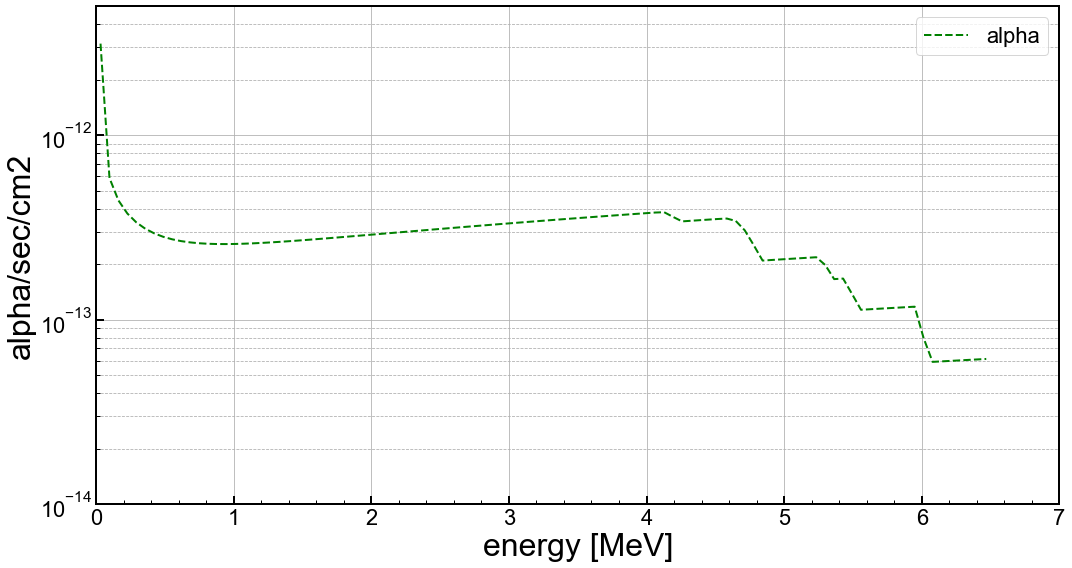

In [70]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes

#Eplot=np.linspace(0,5000,1000)
print(Ea)

ax1.plot(Ea, Ra,color='g',linestyle='--',label="alpha")
#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-14
ymax = 5e-12


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 7) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [MeV]')
ax1.set_ylabel('alpha/sec/cm2')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [ ]:
#make lists of isotopes and half-lives

th232n =14
u238ppm = 3e-14
u238R = (1/U238tmean[0])*u238ppm
U238thalf = np.zeros((u238n,))
U238thalf[0]= 4.468e9*365*24*60*60 #seconds
U238thalf[1]= 24.10*24*60*60
U238thalf[2]= 1.159*60
U238thalf[3]= 2.455e5*365*24*60*60
U238thalf[4]= 7.54e4*365*24*60*60
U238thalf[5]= 1600*365*24*60*60
U238thalf[6]= 3.8235*24*60*60
U238thalf[7]= 3.098*60
U238thalf[8]= 27.06*60
U238thalf[9]= 19.9*60
U238thalf[10]= 163.6e-6
U238thalf[11]= 22.20*365*24*60*60
U238thalf[12]= 5.012*24*60*60
U238thalf[13]= 138.376*24*60*60
print(U238thalf)
U238tmean = U238thalf/np.log(2)
print(U238tmean)
U238N = u238R*U238tmean
print(U238N)
U238chain = np.asarray(U238thalf,dtype=np.dtype('U25'))
U238chain[0] = '922380'
U238chain[1] = '902340'
U238chain[2] = '912340'
U238chain[3] = '922340'
U238chain[4] = '902300'
U238chain[5] = '882260'
U238chain[6] = '862220'
U238chain[7] = '842180'
U238chain[8] = '822140'
U238chain[9] = '832140'
U238chain[10] = '842140'
U238chain[11] = '822100'
U238chain[12] = '832100'
U238chain[13] = '842100'
print(U238chain)
U238decay = np.asarray(U238thalf,dtype=np.dtype('U25'))
U238decay[0] = 'alpha'
U238decay[1] = 'beta'
U238decay[2] = 'beta'
U238decay[3] = 'alpha'
U238decay[4] = 'alpha'
U238decay[5] = 'alpha'
U238decay[6] = 'alpha'
U238decay[7] = 'alpha'
U238decay[8] = 'beta'
U238decay[9] = 'beta'
U238decay[10] = 'alpha'
U238decay[11] = 'beta'
U238decay[12] = 'beta'
U238decay[13] = 'alpha'
print(U238decay)

#ebins = np.linspace(0,5,100)
#xcq = (ebins[:-1] + ebins[1:]) / 2
#n,nx = np.histogram(En+0.764,bins=ebins)

In [15]:
#get some cross section data
import ENDF6
f = open('data/jendl5_3He.endf6')
lines = f.readlines()
sec = ENDF6.find_section(lines, MF=3, MT=2)  # Elastic
x, y = ENDF6.read_table(sec)

sec_np = ENDF6.find_section(lines, MF=3, MT=103)  # Elastic
xnp, ynp = ENDF6.read_table(sec_np)

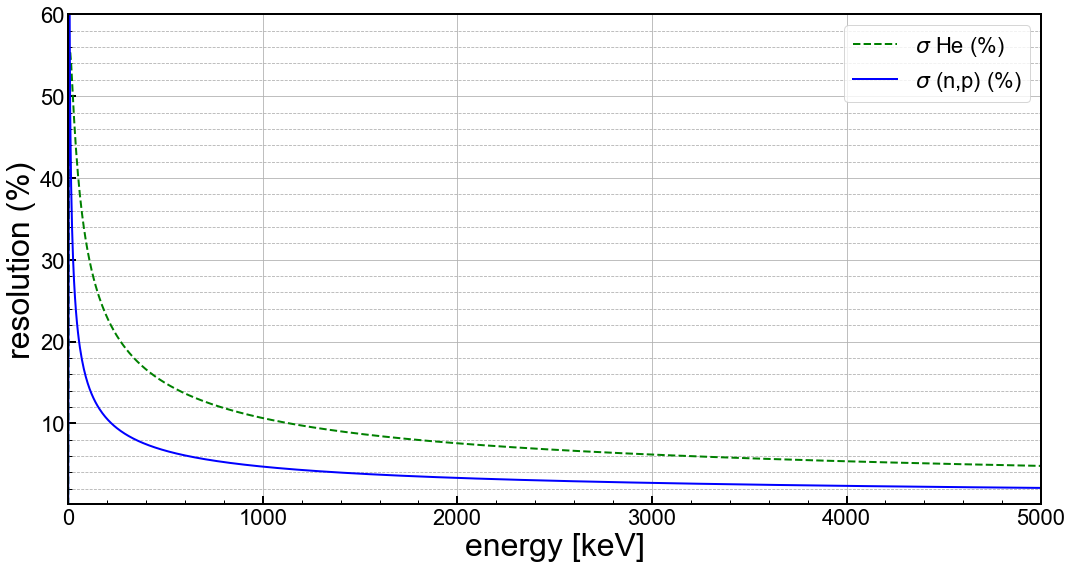

In [50]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes

Eplot=np.linspace(0,5000,1000)

ax1.plot(Eplot, 100*he_res(Eplot),color='g',linestyle='--',label="$\sigma$ He (%)")
ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-1
ymax = 60


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 5*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV]')
ax1.set_ylabel('resolution (%)')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [53]:
#for all that have penetrated, how much proton path they loose. 
dgen_nplow = np.random.exponential(Sigmanp(Enlow))
thetgen_nplow = np.random.uniform(0,np.pi,np.shape(Enlow))
print(np.shape(Enlow))
print(np.shape(dgen_nplow))
print(np.shape(thetgen_nplow))
print(dgen_nplow[0:10])
print(thetgen_nplow[0:10])

(948,)
(948,)
(948,)
[2.11561531e-02 1.77420771e+02 2.78931197e+02 3.01314656e+01
 5.92041687e+01 3.01988050e+01 1.19801596e+01 1.88863943e+02
 1.83938489e+01 9.70228199e+01]
[1.55075102 0.78551329 2.01728411 2.57544695 1.60321717 1.53640606
 3.03579716 0.65605797 0.07288718 0.57245451]


In [54]:
lw_nplow = dgen_nplow/np.cos(thetgen_nplow)

In [55]:
cNoChange_nplow = (thetgen_nplow>=np.pi/2) | (~cEscape_nplow) | (protRange_nplow<=lw_nplow)
print(np.shape(Enlow[cNoChange_nplow]))

(948,)


In [56]:
print(np.shape(Enlow[cEscape_nplow]))
print(np.shape(Enlow))

(943,)
(948,)


In [57]:
perc_nplow = lw_nplow/protRange_nplow

In [58]:
En_mod_low = Enlow+Q
En_mod_low[~cNoChange_nplow] = (En_mod_low[~cNoChange_nplow])*perc_nplow[~cNoChange_nplow]

In [59]:
Enlow_res = (En_mod_low) + np.random.normal(0,(En_mod_low)*np.abs(er_res((En_mod_low)*1000)),np.shape(En_mod_low))
Enel1x_res = Enel1x + np.random.normal(0,Enel1x*(he_res(Enel1x*1000)),np.shape(Enel1x))


ebins = np.linspace(0,5,100)
xcq = (ebins[:-1] + ebins[1:]) / 2
ndata,nxdata = np.histogram(Enlow_res,bins=ebins)

neldata,nxeldata = np.histogram(Enel1x_res,bins=ebins)

sigdata = np.sqrt(ndata+neldata)
sigeldata = np.sqrt(neldata)

In [60]:
#apply FC error bars
fcup = [1.29,2.75,4.25,5.30,6.78,7.81,9.28,10.30,11.32,12.79,13.81,14.82,16.29,17.30,18.32,19.32,20.80,21.81,22.82,23.82,25.30]
fcdn = [0.00,0.37,0.74,1.10,2.34,2.75,3.82,4.25,5.30,6.33,6.78,7.81,8.83,9.28,10.30,11.32,12.33,12.79,13.81,14.82,15.83]

print(np.shape(fcup))
print(np.shape(fcdn))

(21,)
(21,)
